In [34]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [132]:
import pandas as pd
import numpy as np
import sidekick

In [133]:
df = pd.read_csv(
    "https://storage.googleapis.com/bucket-8732/datalibrary/forecast_sales.csv"
)

# Corrupt the dataset
df.loc[[0, 5, 100], "Year"] = np.NaN
df.loc[[0, 1, 2], "Day"] = np.NaN

In [101]:
## Inspect what the data contains

In [102]:
table.head()

,Date,Year,Week,Day,Store Name,Location,Store Type,Advertising Level,Special Promotion,Holiday,Open,Revenue
1,2016-01-01,2016.0,1,NaN,Cuckoo,Stockholm,Standard,Low,No,Yes,No,0.00
2,2016-01-01,2016.0,1,NaN,Eel,Göteborg,Family,Medium,No,Yes,Yes,335.84
3,2016-01-01,2016.0,1,Friday,Goose,Göteborg,Select,Low,No,Yes,No,0.00
4,2016-01-01,2016.0,1,Friday,Alligator,Göteborg,Family,Medium,No,Yes,Yes,230.06
6,2016-01-01,2016.0,1,Friday,Shark,Malmö,Standard,Medium,No,Yes,No,0.00


In [103]:
# Here we see statistics about or features. 
# Notice that only the numerical ones have such statistics
table.describe()

,Year,Week,Revenue
count,99345.000000,99345.000000,99345.000000
mean,2017.499019,26.876209,122.806882
std,1.118332,15.067022,67.432056
min,2016.000000,1.000000,0.000000
25%,2016.000000,14.000000,79.820000
50%,2017.000000,27.000000,114.320000
75%,2018.000000,40.000000,158.310000
max,2019.000000,53.000000,577.520000


In [104]:
table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99345 entries, 1 to 99347
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               99345 non-null  object 
 1   Year               99345 non-null  float64
 2   Week               99345 non-null  int64  
 3   Day                99343 non-null  object 
 4   Store Name         99345 non-null  object 
 5   Location           99345 non-null  object 
 6   Store Type         99345 non-null  object 
 7   Advertising Level  99345 non-null  object 
 8   Special Promotion  99345 non-null  object 
 9   Holiday            99345 non-null  object 
 10  Open               99345 non-null  object 
 11  Revenue            99345 non-null  float64
dtypes: float64(2), int64(1), object(9)
memory usage: 9.9+ MB


In [105]:
# TODO: Might need to do one-hot encoding here
# Seems the platform is already converting categorical to one-hot

In [106]:
df = sidekick.remove_duplicate_table_rows(df)

In [108]:
#table = sidekick.impute_table_columns(df, columns=["Year", "Day", "Advertising Level"], method="replace", value=4)
table = sidekick.impute_table_columns(df, columns=df.columns, target="Revenue", method="replace", value=8)
table

,Date,Year,Week,Day,Store Name,Location,Store Type,Advertising Level,Special Promotion,Holiday,Open,Revenue
0,2016-01-01,8.0,1,8,Mammoth,Stockholm,Family,Low,No,Yes,No,304.40
1,2016-01-01,2016.0,1,8,Cuckoo,Stockholm,Standard,Low,No,Yes,No,0.00
2,2016-01-01,2016.0,1,8,Eel,Göteborg,Family,Medium,No,Yes,Yes,335.84
3,2016-01-01,2016.0,1,Friday,Goose,Göteborg,Select,Low,No,Yes,No,0.00
4,2016-01-01,2016.0,1,Friday,Alligator,Göteborg,Family,Medium,No,Yes,Yes,230.06
...,...,...,...,...,...,...,...,...,...,...,...,...
99343,2019-12-31,2019.0,53,Tuesday,Moose,Stockholm,Standard,Medium,No,Yes,No,0.00
99344,2019-12-31,2019.0,53,Tuesday,Narwhal,Linköping,Standard,Low,No,Yes,No,0.00
99345,2019-12-31,2019.0,53,Tuesday,Manatee,Oslo,Family,Low,No,Yes,Yes,195.25
99346,2019-12-31,2019.0,53,Tuesday,Grouse,Stockholm,Select,8,No,Yes,No,0.00


In [117]:
table = sidekick.impute_table_columns(df, columns=df.columns, target="Revenue", method="drop")
table

,Date,Year,Week,Day,Store Name,Location,Store Type,Advertising Level,Special Promotion,Holiday,Open,Revenue
3,2016-01-01,2016.0,1,Friday,Goose,Göteborg,Select,Low,No,Yes,No,0.00
4,2016-01-01,2016.0,1,Friday,Alligator,Göteborg,Family,Medium,No,Yes,Yes,230.06
6,2016-01-01,2016.0,1,Friday,Shark,Malmö,Standard,Medium,No,Yes,No,0.00
9,2016-01-01,2016.0,1,Friday,Giraffe,Oslo,Family,Low,No,Yes,Yes,204.10
14,2016-01-01,2016.0,1,Friday,Crocodile,Göteborg,Family,Low,No,Yes,Yes,233.50
...,...,...,...,...,...,...,...,...,...,...,...,...
99341,2019-12-31,2019.0,53,Tuesday,Snail,Linköping,Family,Low,No,Yes,Yes,240.46
99342,2019-12-31,2019.0,53,Tuesday,Wallaby,Oslo,Family,Low,No,Yes,Yes,163.43
99343,2019-12-31,2019.0,53,Tuesday,Moose,Stockholm,Standard,Medium,No,Yes,No,0.00
99344,2019-12-31,2019.0,53,Tuesday,Narwhal,Linköping,Standard,Low,No,Yes,No,0.00


<AxesSubplot:>

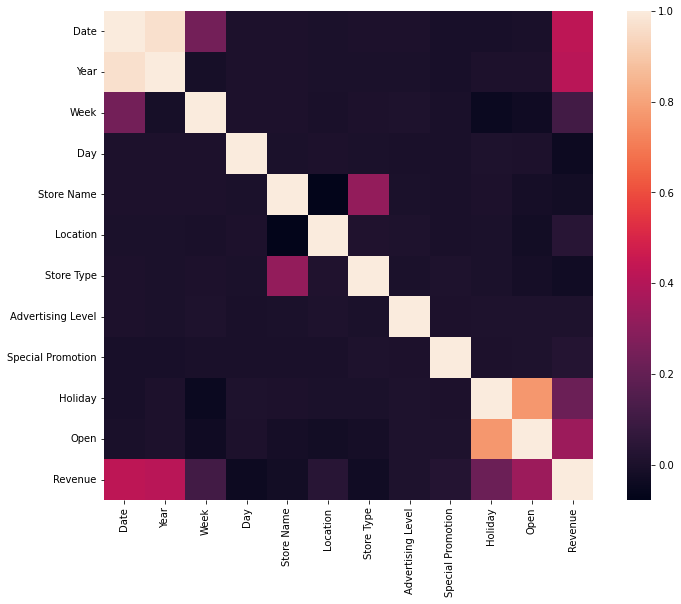

In [141]:
sidekick.plot_correlation(table)

/home/markussagen/.pyenv/versions/3.8.5/envs/sidekick/lib/python3.8/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


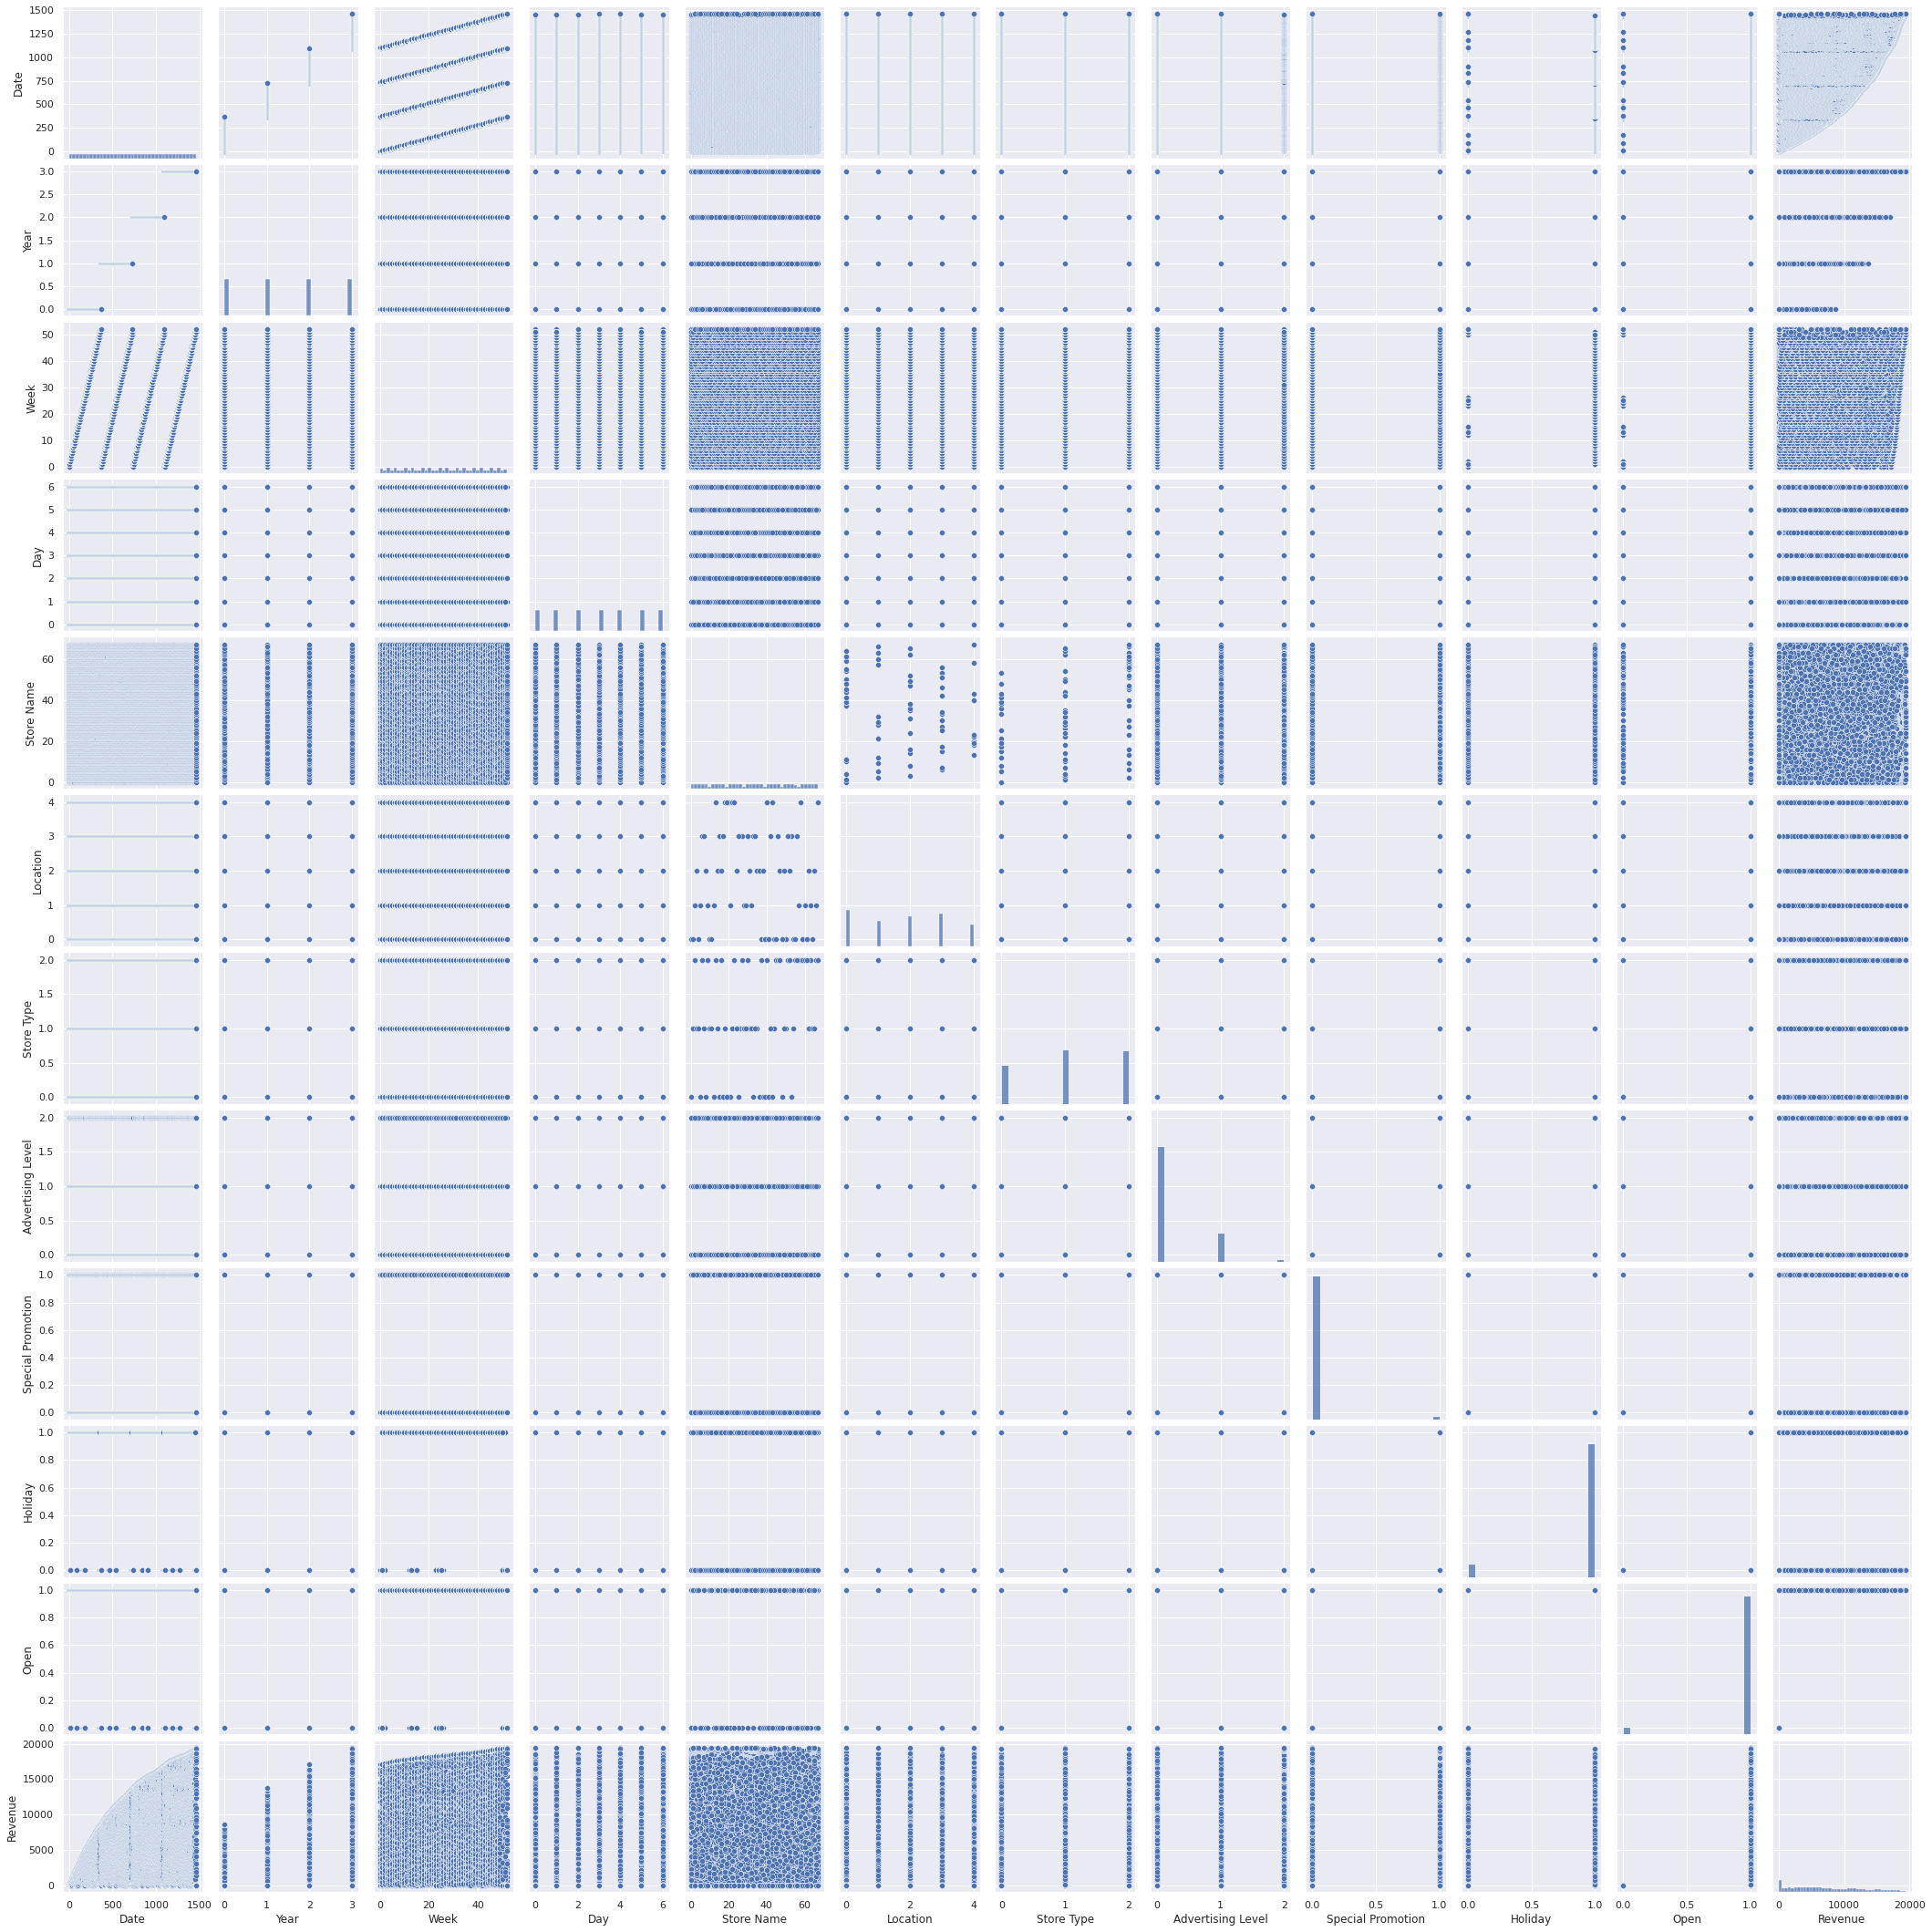

In [146]:
sidekick.plot_pairs(table, table.columns)